## Listing 1 a & b Load Libraries and Dataset

In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

file = "/Users/Aaron/Desktop/CSC767/breast-cancer.data"
df = pd.read_csv(file)

Listing 1 Analysis:
Upon loading up the dataset and libraries, it is clear that this is a classification task. We've imported all of the standard algorithms for classification and their scoring methods as well. 

## Listing 2 
Dimensions of the dataset. Peek at the data itself. Statistical summary of all attributes. Breakdown of the data by the class variable.

### Listing 2a Print Shape of Data

In [2]:
df.shape

(286, 10)

### Listing 2b Print dataset rows

In [3]:
df.head(20)

,Class,Age,Menopause,Tumor-size,inv-nodes,node_caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
5,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
6,no-recurrence-events,50-59,premeno,25-29,0-2,no,2,left,left_low,no
7,no-recurrence-events,60-69,ge40,20-24,0-2,no,1,left,left_low,no
8,no-recurrence-events,40-49,premeno,50-54,0-2,no,2,left,left_low,no
9,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,left_up,no


A quick look at this data reveals a bunch of categorial data that our machine cannot understand, so we need to edit it and turn it into numerical data.

In [4]:
df.Class.replace(['no-recurrence-events','recurrence-events'],[0,1],inplace = True)
df.Class.value_counts()

0    201
1     85
Name: Class, dtype: int64

Block of code that replaces all of the object variables with dummy variables of dtype int so that that algorithms can understand the data

In [5]:
df.Age.replace(['20-29','30-39','40-49','50-59','60-69','70-79'],
           [25,35,45,55,65,75], inplace = True)
#replace age objects with average of each age category
df.Menopause.replace(['premeno','ge40','lt40'],[0,1,2], inplace = True)
#replace menopause objects with dummy variables
df['Tumor-size'].replace(['0-4','5-9','10-14','15-19','20-24','25-29',
                          '30-34','35-39','40-44','45-49','50-54'],
                         [2,7,12,17,22,27,32,37,42,47,52], inplace = True)
#replace tumor size objects with average size for each tumor category
df['inv-nodes'].replace(['0-2','3-5','6-8','9-11','12-14','15-17','24-26'],
          [1,4,7,10,13,16,25], inplace = True)
#replace inv-nodes objects with average of each inv-nodes object range
df['node_caps'].replace(['no','yes','?'], [0,1,2], inplace = True)
#replace node caps no yes and ? in dataframe with 0, 1, 2
df.breast.replace(['left','right'], [0,1], inplace = True)
#replace breast objects with dummy variables
df['breast-quad'].replace(['left_low','left_up','right_up','right_low','central','?'], [0,1,2,3,4,5],inplace = True)
#replace breast-quad objects with dummy variables
df.irradiat.replace(['no','yes'],[0,1], inplace = True)
#replace irradiat objects with dummy variables
df.head(20)

,Class,Age,Menopause,Tumor-size,inv-nodes,node_caps,deg-malig,breast,breast-quad,irradiat
0,0,35,0,32,1,0,3,0,0,0
1,0,45,0,22,1,0,2,1,2,0
2,0,45,0,22,1,0,2,0,0,0
3,0,65,1,17,1,0,2,1,1,0
4,0,45,0,2,1,0,2,1,3,0
5,0,65,1,17,1,0,2,0,0,0
6,0,55,0,27,1,0,2,0,0,0
7,0,65,1,22,1,0,1,0,0,0
8,0,45,0,52,1,0,2,0,0,0
9,0,45,0,22,1,0,2,1,1,0


### Listing 2c Print the statistical descriptions of the data

In [6]:
print(df.describe(include='all'))

            Class         Age   Menopause  Tumor-size   inv-nodes   node_caps  \
count  286.000000  286.000000  286.000000  286.000000  286.000000  286.000000   
mean     0.297203   51.643357    0.500000   26.405594    2.573427    0.251748   
std      0.457828   10.118183    0.547723   10.529649    3.451904    0.495149   
min      0.000000   25.000000    0.000000    2.000000    1.000000    0.000000   
25%      0.000000   45.000000    0.000000   22.000000    1.000000    0.000000   
50%      0.000000   55.000000    0.000000   27.000000    1.000000    0.000000   
75%      1.000000   55.000000    1.000000   32.000000    4.000000    0.000000   
max      1.000000   75.000000    2.000000   52.000000   25.000000    2.000000   

        deg-malig      breast  breast-quad    irradiat  
count  286.000000  286.000000   286.000000  286.000000  
mean     2.048951    0.468531     1.132867    0.237762  
std      0.738217    0.499883     1.241040    0.426459  
min      1.000000    0.000000     0.000000

### Listing 2d Print the class distribution in the data-set.

In [7]:
# print the class distribution
print(df.groupby('Class').size())

Class
0    201
1     85
dtype: int64


### Listing 2 Analysis:
Upon inspecting the data, we see that it has 9 columns of feature data with 1 being our labeled class data. The shape of the data is 286 by 10 showing we have 286 samples of data in the dataset. When looking at our columns we see that the data is filled with object datatypes, data which no machine learning algorithm can understand so we chose to replace our categorical variables with dummy variables of dtype integer. After replacing the data we looked at the statistical descriptions and found that there are some data points that could be ommitted but to be sure listing 3 will give us more detail and information about how we should proceed.

## Listing 3
Univariate plots to better understand each attribute. Multivariate plots to better understand the relationships between attributes.

### Listing 3a

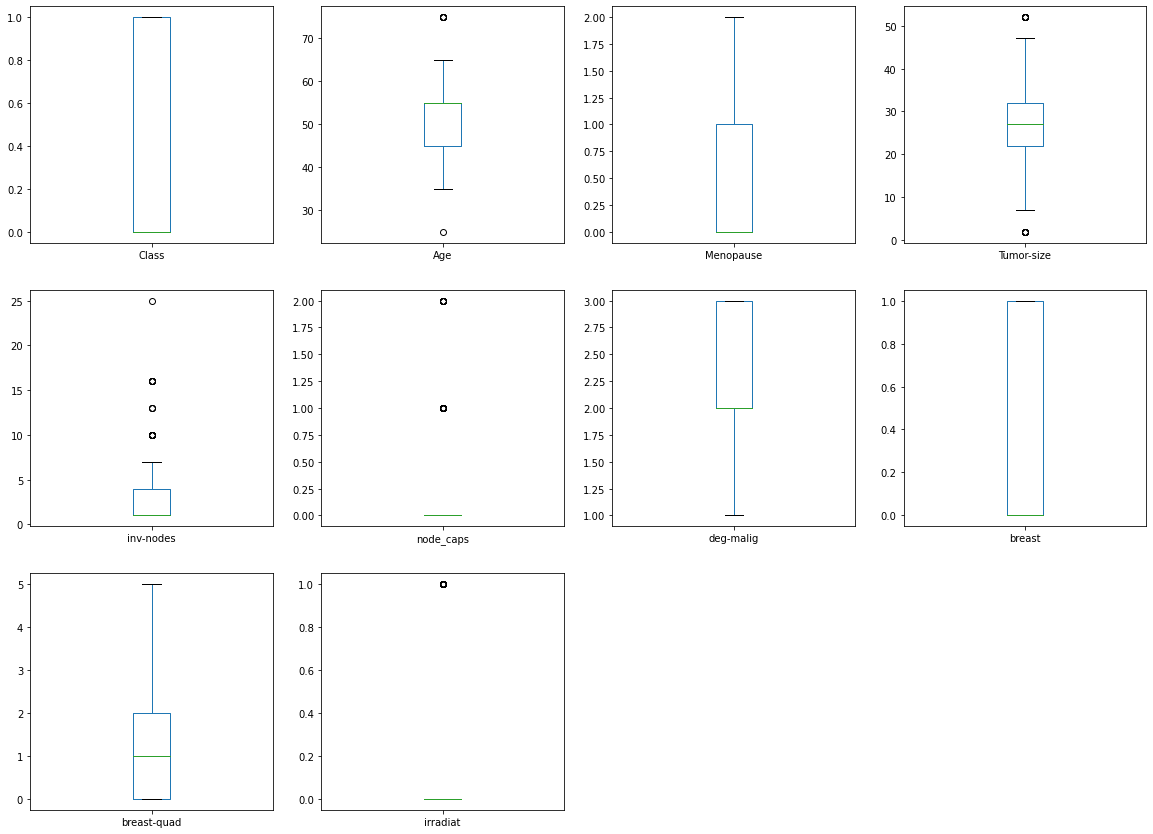

In [8]:
df.plot(kind='box', subplots=True, layout=(4, 4), figsize = (20,20), sharex=False, sharey=False)
plt.show()

### Listing 3b

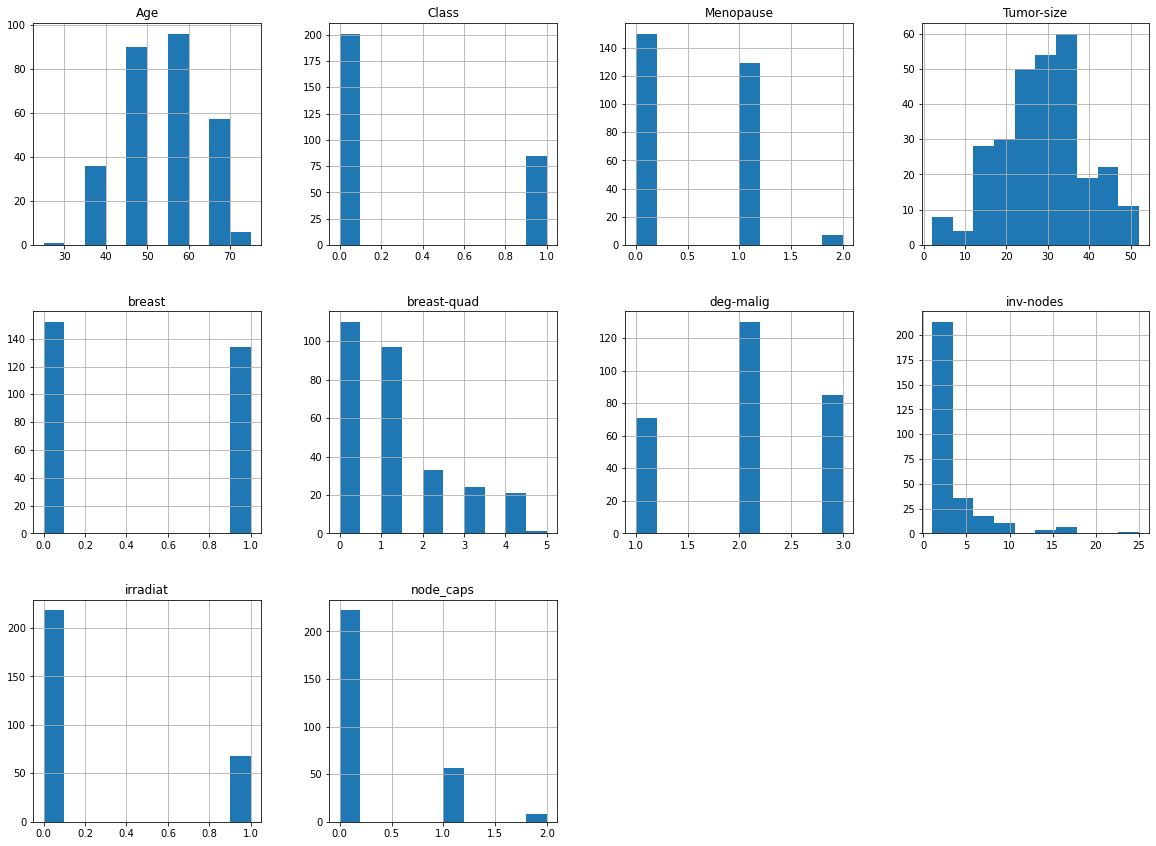

In [9]:
df.hist(layout = (4,4),figsize = (20,20))
plt.show()

### Listing 3c

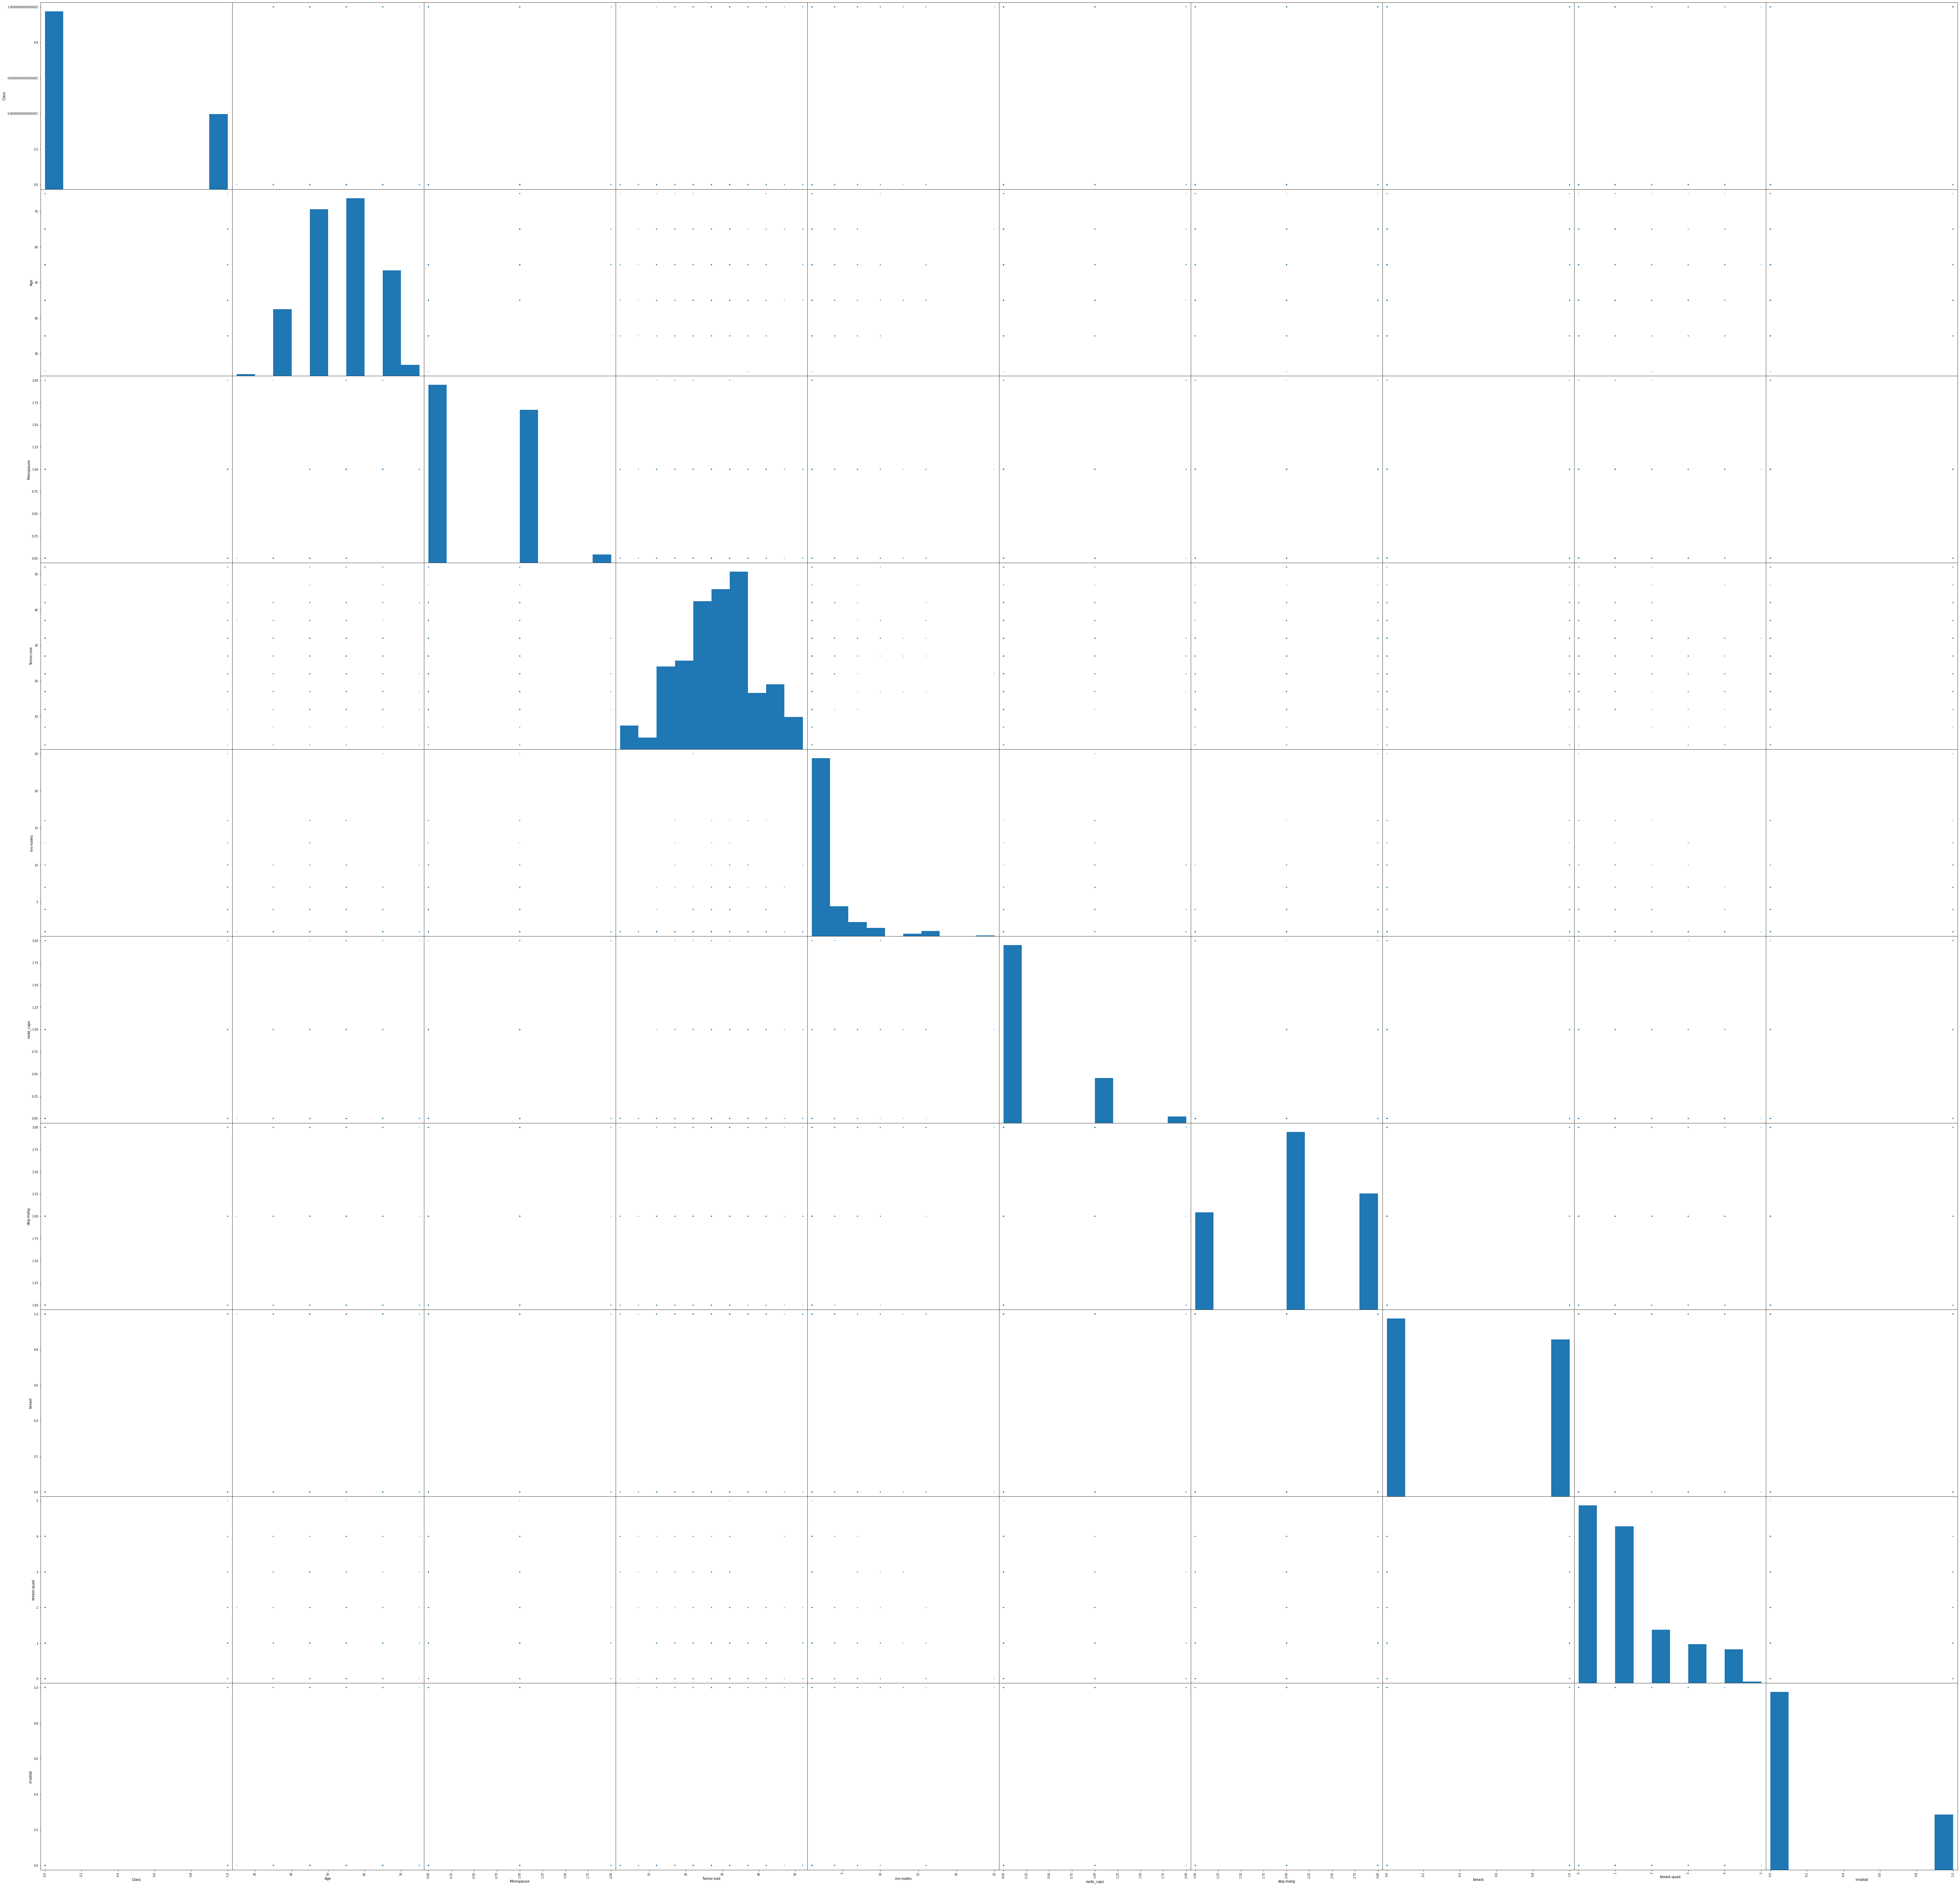

In [52]:
scatter_matrix(df, figsize = (100,100))
plt.show()

In [11]:
df['deg-malig'].value_counts()

2    130
3     85
1     71
Name: deg-malig, dtype: int64

### Listing 3 Analysis:
Upon further inspection of the data we can definitley see which feature columns seem to be important for classification and which seem to be useless for diagnosising whether one has cancer or not. Specifically the scatter matrix plot has given us more insight as to which columns should be kept and which should be dropped. Specifically we found Age, Tumor Size, Menopause, deg-malig, and breast-quad as the most significant features that affect classification.

## Listing 4

### Listing 4a

In [99]:
array = df.values
seed = 7
X = df.drop(["Class","node_caps","irradiat"], axis = 1)
y = df.Class
validation_size = 0.20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = validation_size)
X.shape

(286, 7)

### Listing 4b

In [100]:
models = [('LR', LogisticRegression(max_iter = 100000)), ('LDA', LinearDiscriminantAnalysis()), 
          ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), 
          ('NB', GaussianNB()), ('SVM', SVC())]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed, shuffle = True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.729249 (0.113436)
LDA: 0.733597 (0.102359)
KNN: 0.631621 (0.103807)
CART: 0.640119 (0.113668)
NB: 0.738142 (0.091693)
SVM: 0.689526 (0.083503)


### Listing 4c

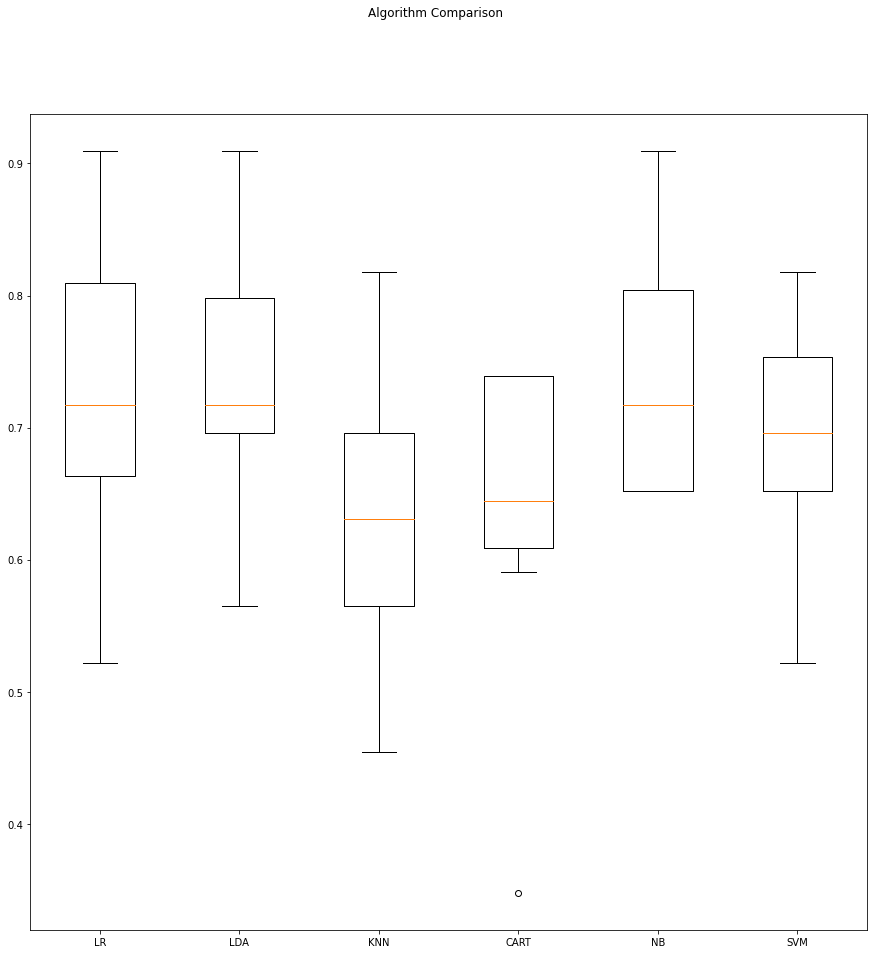

In [101]:
# Compare Algorithms
fig = plt.figure(figsize = (15,15))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

### Listing 4 Analysis:
After deleting some of the columns that we thought would improve model performance we ended up getting subpar models with average accuracy scores in the low 70s. The model that performed the best in our trials is the GaussianNB classifier with an average accuracy score of 73.81% but with a very high standard deviation of 9.2%. We believe that if we create more features than perhaps the models will perform more accurately and better.

### Listing 5

In [25]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

0.6551724137931034
[[36  6]
 [14  2]]
              precision    recall  f1-score   support

           0       0.72      0.86      0.78        42
           1       0.25      0.12      0.17        16

    accuracy                           0.66        58
   macro avg       0.48      0.49      0.47        58
weighted avg       0.59      0.66      0.61        58



### Listing 5 Analysis:
Using the K nearest neighbors classifier is one of the worse performing models as we can see it having an accuracy of 65.52%. Upon looking at the confusion matrix one can see that it is predicting a lot of False Negatives in the Cross Validation sets. 